In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle


In [2]:
credict = pd.read_csv('creditcard.csv')
print(credict.shape)
credict.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credict.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check if the nan value is in the data

In [4]:
credict.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###  0: 正常 ; 1:被盜刷

0    0.998273
1    0.001727
Name: Class, dtype: float64


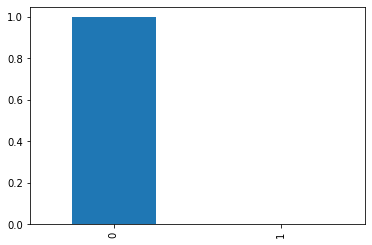

In [5]:
print(credict.Class.value_counts(normalize=True))
credict.Class.value_counts(normalize=True).plot.bar()


# Feature

## AMOUNT


In [6]:
credict.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

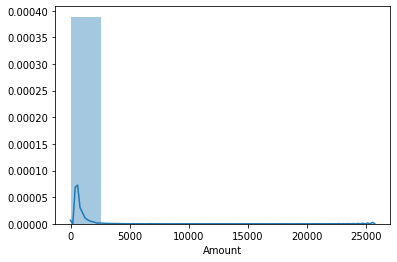

In [7]:
sns.distplot(credict[credict.Class == 0].Amount, bins=10 )

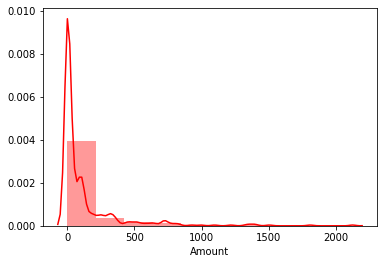

In [8]:
sns.distplot(credict[credict.Class == 1].Amount, bins=10, color='r' )

# Time (資料集中每個刷卡時間和第一次刷卡時間之間經過的秒數)

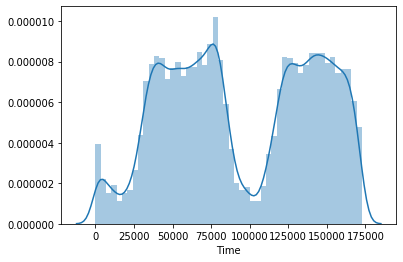

In [9]:
sns.distplot(credict.Time)

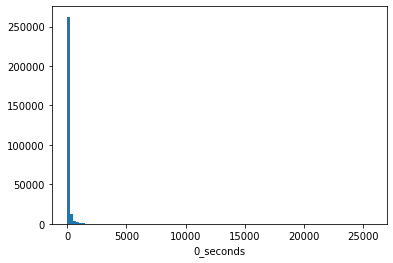

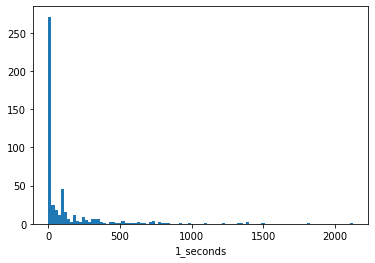

In [10]:
for c in [0, 1]:
    plt.figure()
    plt.hist(credict[credict.Class == c].Amount, bins=100)
    
    plt.xlabel(f'{c}_seconds')

# Data Preprocessing

In [11]:
norm_credict = credict.copy()
SCALER_FEATURE =  ['Time', 'Amount']
for c in SCALER_FEATURE:
    norm_credict[f'norm_{c}'] =MinMaxScaler((-1, 1)).fit_transform(norm_credict[c].values.reshape(-1, 1))[:,0]
    norm_credict.drop(c, 1, inplace=True)

In [12]:
norm_credict.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_Time,norm_Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,0.097433,-0.993122
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,0.549657,0.019471
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-1.000000,-1.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.372639,-0.999564
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-0.019723,-0.998287
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.612580,-0.993993
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.000000,1.000000


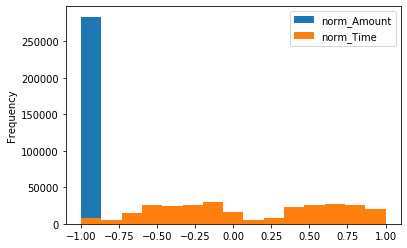

In [15]:
norm_credict[['norm_Amount', 'norm_Time']].plot.hist(bins=15)

### Train、validation、Test

In [16]:
norm_credict = shuffle(norm_credict)
norm_credict = norm_credict.reset_index(drop=True, inplace=False)
norm_credict.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_Time,norm_Amount
0,1.311977,0.428712,-1.322032,0.312937,1.096225,0.298604,0.115628,0.143085,-0.139323,-0.551840,...,-0.570676,-0.266259,-1.853705,0.659857,0.492152,-0.027744,0.009308,0,-0.393606,-0.999941
1,-0.711594,1.015228,1.828008,0.148312,0.021081,-1.025811,1.052790,-0.125645,-0.578916,-0.709683,...,0.405776,-0.244158,0.688225,0.351013,-0.458720,0.059689,0.100877,0,-0.541148,-0.997680
2,1.232986,0.305660,0.278997,1.129053,-0.328354,-0.979898,0.186548,-0.201874,0.069794,0.029434,...,0.076331,-0.096876,0.382355,0.665835,-0.327096,0.008885,0.020104,0,-0.466492,-0.999222
3,2.132924,-0.809094,-2.068519,-1.388547,0.819271,1.050757,-0.487103,0.206271,-0.887214,0.884778,...,1.134293,0.046651,-0.891165,0.108673,0.057943,-0.009623,-0.091336,0,0.714582,-0.999222
4,-0.336267,0.644847,1.641061,-0.295120,0.114248,0.034458,0.179610,0.139710,1.464250,-1.038081,...,-0.403887,-0.048047,-0.457503,-0.560795,-0.601596,0.146721,0.149378,0,0.265973,-0.999222


In [17]:
X = norm_credict.drop('Class', 1)
y = norm_credict['Class']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42)



X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256326, 30), (28481, 30), (256326,), (28481,))

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.1, 
                                                  random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((230693, 30), (25633, 30), (230693,), (25633,))

In [20]:
validation_data = pd.concat([X_val, y_val], 1)
validation_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,norm_Time,norm_Amount,Class
283839,1.827838,-0.691294,-0.399843,0.480063,-0.903512,-0.667852,-0.506814,-0.071461,1.133561,0.044417,...,0.603042,0.124052,0.022438,-0.392897,0.533242,-0.043891,-0.033180,0.817272,-0.992643,0
155249,1.291113,-0.715701,0.033093,-0.847459,-0.956826,-0.791990,-0.300626,-0.173733,-1.009401,0.719796,...,-0.646046,-0.040506,0.412691,0.304693,1.449936,-0.110352,-0.010037,-0.085039,-0.995882,0
181962,2.079604,-0.034048,-1.492180,0.152462,0.284079,-0.779862,0.152907,-0.265942,0.747614,-0.109341,...,0.920398,0.007094,0.628484,0.352966,-0.443028,0.007062,-0.048344,0.316323,-0.999922,0
169990,1.434057,-0.106169,-1.419171,4.046839,0.484122,-0.462847,1.037695,-0.452478,-1.363841,1.355532,...,0.833856,-0.325043,0.115109,0.366309,0.257761,-0.106595,-0.013739,0.374323,-0.978210,0
121783,-3.870757,5.290932,-4.679543,1.080202,-1.254687,-2.551886,-0.699936,1.640723,1.969917,2.561103,...,-0.568169,0.556371,0.266707,0.330016,-0.340496,1.314330,0.675219,-0.068348,-0.999861,0


### SMOTE  (only on train data)

In [21]:
from keras.utils import np_utils
from collections import Counter

from imblearn.over_sampling import SMOTE

In [22]:


print('Before resampled dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))


Before resampled dataset shape Counter({0: 230286, 1: 407})
Resampled dataset shape Counter({0: 230286, 1: 230286})


# Train

In [23]:
from util import *
import numpy as np

In [24]:
import tensorflow as tf
tf.random.set_seed(50)

In [25]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_128 = tf.keras.layers.Dense(128)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_8 = tf.keras.layers.Dense(8)


    def call(self, inputs):
        x = self.dense_128(inputs)
        x = self.dense_64(x)
        x = self.dense_32(x)
        x = self.dense_8(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_8 = tf.keras.layers.Dense(8)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_128 = tf.keras.layers.Dense(128)
        
    def call(self, inputs):
        x = self.dense_8(inputs)
        x = self.dense_32(x)
        x = self.dense_64(x)
        x = self.dense_128(x)
        return x

In [26]:
class CredictFraudDetect(tf.keras.Model):
    def __init__(self):
        super().__init__()
        
        self.encoder = Encoder()
        self.decoder = Decoder()
        
        self.dense = tf.keras.layers.Dense(2, activation='softmax')
    def call(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        x = self.dense(x)
        
        return x

In [27]:
X_train_smote, y_train_smote = np.array(X_train_smote), np.array(y_train_smote)

In [28]:

y_train_smote = tf.keras.utils.to_categorical(y_train_smote)
y_train_smote

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [29]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback


class WarmUpLearningRateSchedule(Callback):
    def __init__(self, warmup_epoch):
        super(WarmUpLearningRateSchedule).__init__()
        self.warmup_step = warmup_epoch
        self.schedule = tf.keras.optimizers.schedules.ExponentialDecay

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')

        so_far_lr = self._get_lr()
        if epoch <= self.warmup_step:
            lr = so_far_lr * (1 + 0.5)
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
            print('In Warm up stage')

        else:
            lr = self._get_lr()
            update_lr = self.schedule(lr, decay_steps=100, decay_rate=0.1)(epoch)
#             update_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
            update_lr = 0.001 if update_lr < 0.001 else update_lr
            tf.keras.backend.set_value(self.model.optimizer.lr, update_lr)
            
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, self._get_lr()))
        
        
    def _get_lr(self):
        
        return float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        
reduce_lr = WarmUpLearningRateSchedule(warmup_epoch=3)

In [30]:
# reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.000001, verbose=1)

In [31]:

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

i = tf.keras.layers.Input(shape=X_train_smote[0].shape)
out = CredictFraudDetect()(i)
model = tf.keras.Model(i, out)
model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(class_id=1)])


In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
credict_fraud_detect (Credic (None, 2)                 25618     
Total params: 25,618
Trainable params: 25,618
Non-trainable params: 0
_________________________________________________________________


In [33]:
es = tf.keras.callbacks.EarlyStopping(patience=20)
model.fit(X_train_smote, 
          y_train_smote, 
          batch_size=64, 
          epochs=50, 
          verbose=1,
          validation_data=(X_val, tf.keras.utils.to_categorical(y_val)), 
          callbacks=[es, reduce_lr])

Epoch 1/50
In Warm up stage

Epoch 00000: Learning rate is 0.0015.
7197/7197 [==============================] - 10s 1ms/step - loss: 0.1541 - accuracy: 0.9370 - auc: 0.9857 - recall: 0.9036 - val_loss: 0.1080 - val_accuracy: 0.9837 - val_auc: 0.9957 - val_recall: 0.9091
Epoch 2/50
In Warm up stage

Epoch 00001: Learning rate is 0.0022.
7197/7197 [==============================] - 8s 1ms/step - loss: 0.1471 - accuracy: 0.9399 - auc: 0.9874 - recall: 0.9046 - val_loss: 0.1172 - val_accuracy: 0.9871 - val_auc: 0.9973 - val_recall: 0.9091
Epoch 3/50
In Warm up stage

Epoch 00002: Learning rate is 0.0034.
7197/7197 [==============================] - 8s 1ms/step - loss: 9.0555 - accuracy: 0.9305 - auc: 0.9596 - recall: 0.9141 - val_loss: 0.2460 - val_accuracy: 0.9524 - val_auc: 0.9800 - val_recall: 0.9318
Epoch 4/50
In Warm up stage

Epoch 00003: Learning rate is 0.0051.
7197/7197 [==============================] - 8s 1ms/step - loss: 110.7466 - accuracy: 0.9257 - auc: 0.9463 - recall: 0.913

# Test

In [34]:
pred = model.predict(X_test)
pred

array([[8.7401783e-01, 1.2598221e-01],
       [9.8051000e-01, 1.9489979e-02],
       [9.9965143e-01, 3.4856371e-04],
       ...,
       [3.4149188e-01, 6.5850806e-01],
       [9.6100831e-01, 3.8991656e-02],
       [9.9983633e-01, 1.6368869e-04]], dtype=float32)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from util import plot_confusion_matrix

In [36]:
model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

891/891 [==============================] - 1s 606us/step - loss: 0.1117 - accuracy: 0.9786 - auc: 0.9940 - recall: 0.9268


[0.11173190921545029,
 0.9786173105239868,
 0.9940088987350464,
 0.9268292784690857]

Confusion matrix, without normalization
[[27834   606]
 [    3    38]]


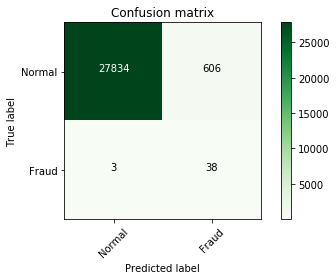

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, np.argmax(pred, -1)), classes=['Normal', 'Fraud'])


In [38]:
print(classification_report(y_test, np.argmax(pred, -1), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28440
           1       0.06      0.93      0.11        41

    accuracy                           0.98     28481
   macro avg       0.53      0.95      0.55     28481
weighted avg       1.00      0.98      0.99     28481



## the wrong prediction in test data



In [39]:
test_data = pd.concat([X_test, y_test], 1)
test_data['predict'] =  np.argmax(pred, -1)
test_data['wrong_predict_with_class_0'] = np.where((test_data.predict==1) & (test_data.Class==0), 1, 0)
test_data['wrong_predict_with_class_1'] = np.where((test_data.predict==0) & (test_data.Class==1), 1, 0)

In [40]:
test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,norm_Time,norm_Amount,Class,predict,wrong_predict_with_class_0,wrong_predict_with_class_1
43428,-0.441225,0.159937,-1.340159,-1.528802,1.386432,-1.586516,1.083920,-0.820373,0.226273,0.203437,...,0.368505,-0.079645,-0.299093,-0.132691,0.127575,-0.998836,0,0,0,0
49906,1.788651,-0.776850,-0.267705,0.354699,-0.561528,0.599305,-0.891499,0.289732,1.046112,0.135486,...,-0.540107,0.134071,-0.012685,-0.026584,0.434025,-0.992854,0,0,0,0
29474,-1.666684,2.203363,-0.686770,-0.875557,-0.106012,-1.245949,0.702246,0.209641,0.752573,1.176528,...,-0.115501,0.163220,0.752142,0.434362,0.686999,-0.999164,0,0,0,0
276481,-0.924351,1.101980,-0.604218,-0.468883,0.195872,-0.342982,1.021113,0.206292,0.252747,-0.884780,...,-0.256210,0.548722,-0.127706,-0.072745,0.452660,-0.992293,0,0,0,0
278846,2.140975,-0.548486,-1.044107,-0.558748,-0.753071,-1.055818,-0.775513,-0.258478,-0.159583,0.038688,...,-0.091415,-0.091315,0.038585,-0.008431,0.656535,-0.998447,0,0,0,0


# the point ,1,  represents the wrong predict in normal class

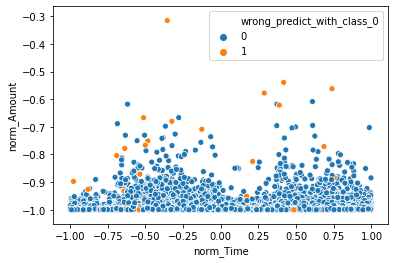

In [42]:
sns.scatterplot(x='norm_Time', y='norm_Amount', hue='wrong_predict_with_class_0', data=test_data)

# the point ,1,  represents the wrong predict in fraud class


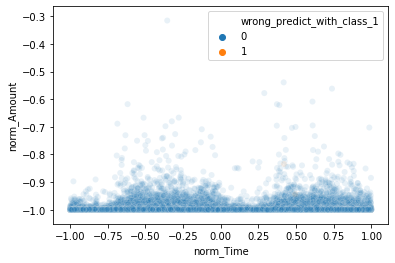

In [44]:
sns.scatterplot(x='norm_Time', y='norm_Amount', hue='wrong_predict_with_class_1', data=test_data, alpha=0.1)